In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_file_path = '/content/drive/MyDrive/Copy of FinalNeoHacksTextSet.zip'
extract_dir = '/content/extracted_data' # You can change this to your preferred directory

# Create the extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
print(f"Contents of '{extract_dir}':")
for item in os.listdir(extract_dir):
    print(f"- {item}")

Successfully extracted '/content/drive/MyDrive/Copy of FinalNeoHacksTextSet.zip' to '/content/extracted_data'
Contents of '/content/extracted_data':
- FinalNeoHacksTextSet


In [ ]:
import pandas as pd


In [ ]:
clinical = pd.read_csv("/content/extracted_data/FinalNeoHacksTextSet/clinical.txt", sep='\t')
eposure = pd.read_csv("/content/extracted_data/FinalNeoHacksTextSet/exposure.txt", sep='\t')
follow_up = pd.read_csv("/content/extracted_data/FinalNeoHacksTextSet/follow_up.txt", sep='\t')
methylation = pd.read_csv("/content/extracted_data/FinalNeoHacksTextSet/methylation.txt", sep='\t')
mutations = pd.read_csv("/content/extracted_data/FinalNeoHacksTextSet/mutations.txt", sep='\t',encoding='latin-1', low_memory=False)
pathology = pd.read_csv("/content/extracted_data/FinalNeoHacksTextSet/pathology_detail.txt", sep='\t')
transcriptomics= pd.read_csv("/content/extracted_data/FinalNeoHacksTextSet/transcriptomics.txt", sep='\t')

In [ ]:
clinical.head(),eposure.head(),follow_up.head(),methylation.head(),mutations.head(),pathology.head(),transcriptomics.head()

(  project.project_id                         cases.case_id cases.consent_type  \
 0          TCGA-HNSC  03aca47b-7653-4938-9178-ed7c37eee6d5   Informed Consent   
 1          TCGA-HNSC  03aca47b-7653-4938-9178-ed7c37eee6d5   Informed Consent   
 2          TCGA-HNSC  03aca47b-7653-4938-9178-ed7c37eee6d5   Informed Consent   
 3          TCGA-HNSC  03aca47b-7653-4938-9178-ed7c37eee6d5   Informed Consent   
 4          TCGA-HNSC  0f718e17-86c1-4221-a878-d57ae87e744f   Informed Consent   
 
   cases.days_to_consent cases.days_to_lost_to_followup  \
 0                    28                            '--   
 1                    28                            '--   
 2                    28                            '--   
 3                    28                            '--   
 4                     0                            '--   
 
         cases.disease_type cases.index_date cases.lost_to_followup  \
 0  Squamous Cell Neoplasms        Diagnosis                     No   
 1  Squa

STEP 1: LOADING DATA
Clinical data shape: (309, 210)
Total patients: 309

✓ Data loaded successfully!

STEP 2: SELECTING RELEVANT FEATURES
Selected 5 features for prediction

Features: ['age', 'gender', 'vital_status', 'grade', 'recurrence']
Target: stage

STEP 3: CLEANING DATA (Remove missing values)

Before cleaning: 309 rows
After removing missing stages: 309 rows

Cancer stages in dataset:
stage
'--           85
Stage I        7
Stage II      44
Stage III     49
Stage IVA    115
Stage IVB      9
Name: count, dtype: int64

STEP 4: CONVERTING TEXT TO NUMBERS (Encoding)
Encoding complete!

Example of encoded data:
   age  gender  vital_status  grade  recurrence  stage
0   67       0             0      1           0      4
1   67       0             0      1           0      4
2   67       0             0      1           0      4
3   67       0             0      1           0      4
4   74       1             0      0           0      0
5   74       1             0      0           0

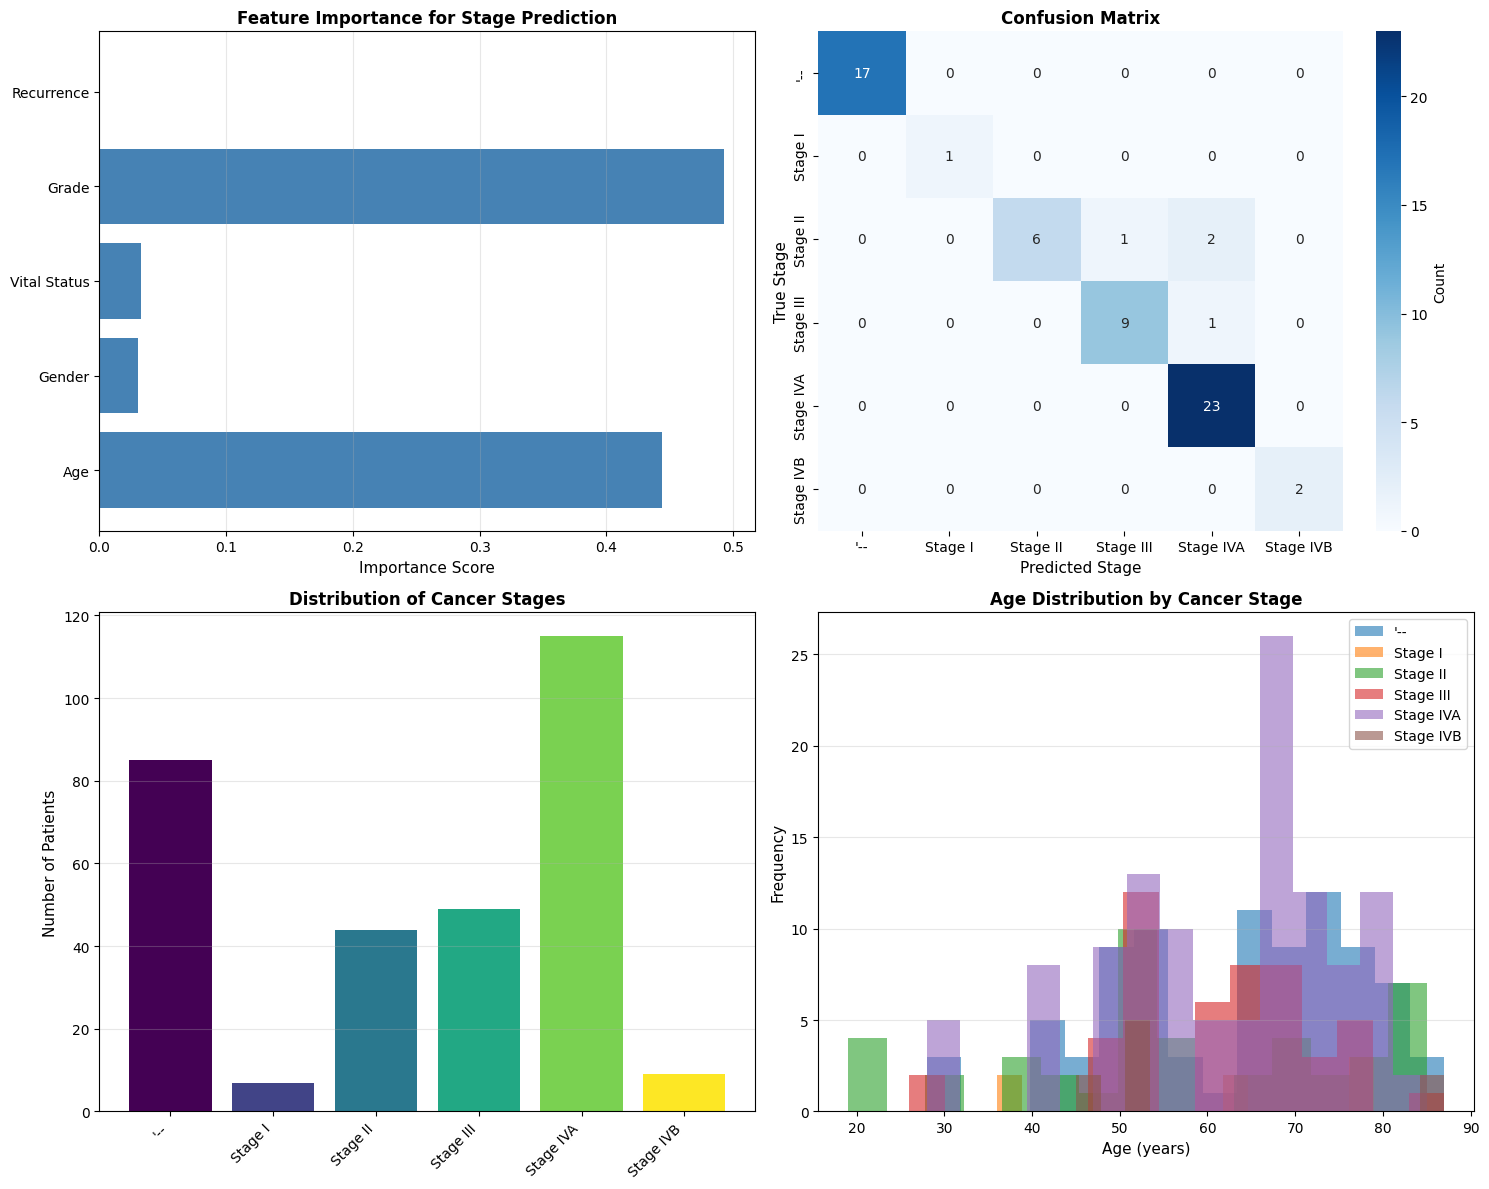

✓ Visualizations complete!

STEP 10: PREDICT STAGE FOR NEW PATIENTS

Example Predictions:
--------------------------------------------------
Patient: Age=45, Gender=male, Status=Alive, Grade=G2, Recurrence=No
  → Predicted Stage: Stage IVA

Patient: Age=65, Gender=female, Status=Dead, Grade=G3, Recurrence=Yes
  → Predicted Stage: Stage IVA

Patient: Age=55, Gender=male, Status=Alive, Grade=G1, Recurrence=No
  → Predicted Stage: Stage IVB


HACKATHON PROJECT SUMMARY

✓ Model Accuracy: 93.55%
✓ Total Patients Analyzed: 309
✓ Cancer Stages Predicted: 6
✓ Features Used: Age, Gender, Vital Status, Grade, Recurrence
✓ Most Important Feature: Grade

Next Steps:
1. Try different algorithms (SVM, Gradient Boosting)
2. Add more features (mutations, gene expression)
3. Optimize hyperparameters
4. Write a report with findings



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# ============================================================
# STEP 1: LOAD AND EXPLORE YOUR DATA
# ============================================================
print("="*70)
print("STEP 1: LOADING DATA")
print("="*70)

# Make sure you have loaded these 7 files in Colab already
# clinical, exposure, follow_up, methylation, mutations, transcriptomics

# Use the clinical data (it has all the demographic info)
print(f"Clinical data shape: {clinical.shape}")
print(f"Total patients: {len(clinical)}")
print("\n✓ Data loaded successfully!")

# ============================================================
# STEP 2: SELECT RELEVANT COLUMNS FOR STAGE PREDICTION
# ============================================================
print("\n" + "="*70)
print("STEP 2: SELECTING RELEVANT FEATURES")
print("="*70)

# These columns will help predict cancer stage
features_to_use = [
    'demographic.age_at_index',
    'demographic.gender',
    'demographic.vital_status',
    'diagnoses.tumor_grade',
    'diagnoses.progression_or_recurrence',
    'diagnoses.ajcc_clinical_stage'
]

# Create a clean dataset
data = clinical[features_to_use].copy()

# Rename for easier handling
data.columns = ['age', 'gender', 'vital_status', 'grade', 'recurrence', 'stage']

print(f"Selected {len(data.columns)-1} features for prediction")
print(f"\nFeatures: {list(data.columns[:-1])}")
print(f"Target: {data.columns[-1]}")

# ============================================================
# STEP 3: CLEAN THE DATA
# ============================================================
print("\n" + "="*70)
print("STEP 3: CLEANING DATA (Remove missing values)")
print("="*70)

print(f"\nBefore cleaning: {len(data)} rows")

# Remove rows where stage is missing (marked as '--')
data_clean = data[data['stage'] != "'--'"].copy()

print(f"After removing missing stages: {len(data_clean)} rows")

# Show what stages we have
print("\nCancer stages in dataset:")
print(data_clean['stage'].value_counts().sort_index())

# ============================================================
# STEP 4: ENCODE CATEGORICAL DATA
# ============================================================
print("\n" + "="*70)
print("STEP 4: CONVERTING TEXT TO NUMBERS (Encoding)")
print("="*70)

# Create label encoders for each categorical column
encoders = {}
encoders['gender'] = LabelEncoder()
encoders['vital_status'] = LabelEncoder()
encoders['grade'] = LabelEncoder()
# Removed recurrence encoder here to fit later with all labels
encoders['stage'] = LabelEncoder()

# Apply encoding
data_encoded = data_clean.copy()
data_encoded['gender'] = encoders['gender'].fit_transform(data_clean['gender'])
data_encoded['vital_status'] = encoders['vital_status'].fit_transform(data_clean['vital_status'])
data_encoded['grade'] = encoders['grade'].fit_transform(data_clean['grade'])

# --- FIX: Handle 'recurrence' encoding to include all possible labels ---
# Replace '--' with 'No' in the training data for consistency with test examples
data_clean['recurrence'] = data_clean['recurrence'].replace("'--'", 'No')

# Gather all unique recurrence labels from the cleaned data AND test examples
# This ensures the LabelEncoder learns all possible categories it might encounter.
test_recurrence_labels = set([tp[4] for tp in test_patients]) # Extract recurrence labels from test_patients
all_recurrence_labels = list(set(data_clean['recurrence'].unique()).union(test_recurrence_labels))
all_recurrence_labels.sort() # Sort to ensure consistent encoding order

# Fit the recurrence encoder on this combined set of labels
encoders['recurrence'] = LabelEncoder()
encoders['recurrence'].fit(all_recurrence_labels)

# Now transform the 'recurrence' column using the fitted encoder
data_encoded['recurrence'] = encoders['recurrence'].transform(data_clean['recurrence'])
# --- END FIX ---

data_encoded['stage'] = encoders['stage'].fit_transform(data_clean['stage'])

print("Encoding complete!")
print("\nExample of encoded data:")
print(data_encoded.head(10))

# ============================================================
# STEP 5: PREPARE DATA FOR MACHINE LEARNING
# ============================================================
print("\n" + "="*70)
print("STEP 5: PREPARING DATA FOR MODEL")
print("="*70)

# Separate features (X) and target (y)
X = data_encoded[['age', 'gender', 'vital_status', 'grade', 'recurrence']]
y = data_encoded['stage']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")

# ============================================================
# STEP 6: TRAIN THE MODEL
# ============================================================
print("\n" + "="*70)
print("STEP 6: TRAINING RANDOM FOREST MODEL")
print("="*70)

# Create and train model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10
)

print("Training model... (this may take a few seconds)")
model.fit(X_train, y_train)
print("✓ Model training complete!")

# ============================================================
# STEP 7: EVALUATE MODEL PERFORMANCE
# ============================================================
print("\n" + "="*70)
print("STEP 7: MODEL EVALUATION")
print("="*70)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2%}")
print(f"(This means the model correctly predicted the stage {accuracy*100:.1f}% of the time)")

# Detailed classification report
print("\nDetailed Performance Report:")
print(classification_report(
    y_test, y_pred,
    target_names=encoders['stage'].classes_
))

# ============================================================
# STEP 8: ANALYZE FEATURE IMPORTANCE
# ============================================================
print("\n" + "="*70)
print("STEP 8: FEATURE IMPORTANCE (Which features matter most?)")
print("="*70)

feature_names = ['Age', 'Gender', 'Vital Status', 'Grade', 'Recurrence']
importances = model.feature_importances_

print("\nFeature Importance Ranking:")
for i, (name, importance) in enumerate(sorted(zip(feature_names, importances),
                                               key=lambda x: x[1], reverse=True), 1):
    print(f"{i}. {name:20s}: {importance:.4f} ({importance*100:.2f}%)")

# ============================================================
# STEP 9: CREATE VISUALIZATIONS
# ============================================================
print("\n" + "="*70)
print("STEP 9: CREATING VISUALIZATIONS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Feature Importance
axes[0, 0].barh(feature_names, importances, color='steelblue')
axes[0, 0].set_xlabel('Importance Score', fontsize=11)
axes[0, 0].set_title('Feature Importance for Stage Prediction', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=encoders['stage'].classes_,
            yticklabels=encoders['stage'].classes_,
            cbar_kws={'label': 'Count'})
axes[0, 1].set_title('Confusion Matrix', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('True Stage', fontsize=11)
axes[0, 1].set_xlabel('Predicted Stage', fontsize=11)

# 3. Stage Distribution
stage_counts = data_clean['stage'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0, 1, len(stage_counts)))
axes[1, 0].bar(range(len(stage_counts)), stage_counts.values, color=colors)
axes[1, 0].set_xticks(range(len(stage_counts)))
axes[1, 0].set_xticklabels(stage_counts.index, rotation=45, ha='right')
axes[1, 0].set_title('Distribution of Cancer Stages', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Number of Patients', fontsize=11)
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Age Distribution by Stage
for stage_label in encoders['stage'].classes_:
    stage_idx = np.where(encoders['stage'].classes_ == stage_label)[0][0]
    ages = data_encoded[data_encoded['stage'] == stage_idx]['age'].values
    axes[1, 1].hist(ages, alpha=0.6, label=stage_label, bins=15)
axes[1, 1].set_title('Age Distribution by Cancer Stage', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Age (years)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].legend(loc='upper right', fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Visualizations complete!")

# ============================================================
# STEP 10: MAKE PREDICTIONS ON NEW PATIENTS
# ============================================================
print("\n" + "="*70)
print("STEP 10: PREDICT STAGE FOR NEW PATIENTS")
print("="*70)

# Example: Predict stage for a new patient
# Create a function to make predictions
def predict_stage(age, gender, vital_status, grade, recurrence):
    """
    Predict cancer stage for a new patient
    """
    # Encode inputs
    gender_encoded = encoders['gender'].transform([gender])[0]
    vital_encoded = encoders['vital_status'].transform([vital_status])[0]
    grade_encoded = encoders['grade'].transform([grade])[0]
    recurrence_encoded = encoders['recurrence'].transform([recurrence])[0]

    # Make prediction
    new_data = np.array([[age, gender_encoded, vital_encoded,
                         grade_encoded, recurrence_encoded]])
    predicted_stage_encoded = model.predict(new_data)[0]

    # Decode prediction
    predicted_stage = encoders['stage'].inverse_transform([predicted_stage_encoded])[0]

    return predicted_stage

# Example predictions
print("\nExample Predictions:")
print("-" * 50)

test_patients = [
    (45, 'male', 'Alive', 'G2', 'No'),
    (65, 'female', 'Dead', 'G3', 'Yes'),
    (55, 'male', 'Alive', 'G1', 'No'),
]

for age, gender, vital, grade, recurrence in test_patients:
    predicted = predict_stage(age, gender, vital, grade, recurrence)
    print(f"Patient: Age={age}, Gender={gender}, Status={vital}, Grade={grade}, Recurrence={recurrence}")
    print(f"  → Predicted Stage: {predicted}\n")

# ============================================================
# FINAL SUMMARY
# ============================================================
print("\n" + "="*70)
print("HACKATHON PROJECT SUMMARY")
print("="*70)
print(f"""
✓ Model Accuracy: {accuracy:.2%}
✓ Total Patients Analyzed: {len(data_clean)}
✓ Cancer Stages Predicted: {len(encoders['stage'].classes_)}
✓ Features Used: {', '.join(feature_names)}
✓ Most Important Feature: {feature_names[np.argmax(importances)]}

Next Steps:
1. Try different algorithms (SVM, Gradient Boosting)
2. Add more features (mutations, gene expression)
3. Optimize hyperparameters
4. Write a report with findings
""")
print("="*70)

In [ ]:
import pandas as pd

# Read the clinical data
clinical = pd.read_csv('/content/extracted_data/FinalNeoHacksTextSet/clinical.txt', sep='\t')
print("Clinical Data Shape:", clinical.shape)
print("\nFirst few rows:")
print(clinical.head())
print("\nColumn names:")
print(clinical.columns.tolist())

Clinical Data Shape: (309, 210)

First few rows:
  project.project_id                         cases.case_id cases.consent_type  \
0          TCGA-HNSC  03aca47b-7653-4938-9178-ed7c37eee6d5   Informed Consent   
1          TCGA-HNSC  03aca47b-7653-4938-9178-ed7c37eee6d5   Informed Consent   
2          TCGA-HNSC  03aca47b-7653-4938-9178-ed7c37eee6d5   Informed Consent   
3          TCGA-HNSC  03aca47b-7653-4938-9178-ed7c37eee6d5   Informed Consent   
4          TCGA-HNSC  0f718e17-86c1-4221-a878-d57ae87e744f   Informed Consent   

  cases.days_to_consent cases.days_to_lost_to_followup  \
0                    28                            '--   
1                    28                            '--   
2                    28                            '--   
3                    28                            '--   
4                     0                            '--   

        cases.disease_type cases.index_date cases.lost_to_followup  \
0  Squamous Cell Neoplasms        Diagnosis  

In [ ]:
# Most useful columns for your hackathon
important_cols = [
    'cases.submitter_id',           # Patient ID
    'demographic.age_at_index',     # Patient age
    'demographic.gender',            # Gender
    'demographic.vital_status',      # Alive/Dead (survival)
    'demographic.days_to_death',     # Days to death
    'diagnoses.primary_diagnosis',   # Cancer type
    'diagnoses.ajcc_clinical_stage', # Tumor stage (I, II, III, IV)
    'diagnoses.tumor_grade',         # Grade
    'diagnoses.progression_or_recurrence', # Recurrence
    'treatments.treatment_type',     # What treatment given
    'treatments.treatment_outcome',  # How treatment worked
]

In [ ]:
# Clean up the data
clinical_clean = clinical[important_cols].copy()

# Replace '--' with NaN (missing values)
clinical_clean = clinical_clean.replace('--', None)

# Check for missing values
print("Missing values:")
print(clinical_clean.isnull().sum())

print("\n" + "="*50)
print("KEY STATISTICS:")
print("="*50)

# Age statistics
print("\nAge range:", clinical_clean['demographic.age_at_index'].min(),
      "to", clinical_clean['demographic.age_at_index'].max())

# Gender distribution
print("\nGender distribution:")
print(clinical_clean['demographic.gender'].value_counts())

# Survival status
print("\nVital status (Alive/Dead):")
print(clinical_clean['demographic.vital_status'].value_counts())

# Tumor stage
print("\nTumor stages:")
print(clinical_clean['diagnoses.ajcc_clinical_stage'].value_counts())

# Treatment outcomes
print("\nTreatment outcomes:")
print(clinical_clean['treatments.treatment_outcome'].value_counts())

Missing values:
cases.submitter_id                     0
demographic.age_at_index               0
demographic.gender                     0
demographic.vital_status               0
demographic.days_to_death              0
diagnoses.primary_diagnosis            0
diagnoses.ajcc_clinical_stage          0
diagnoses.tumor_grade                  0
diagnoses.progression_or_recurrence    0
treatments.treatment_type              0
treatments.treatment_outcome           0
dtype: int64

KEY STATISTICS:

Age range: 19 to 87

Gender distribution:
demographic.gender
male      197
female    112
Name: count, dtype: int64

Vital status (Alive/Dead):
demographic.vital_status
Alive    155
Dead     154
Name: count, dtype: int64

Tumor stages:
diagnoses.ajcc_clinical_stage
Stage IVA    115
'--           85
Stage III     49
Stage II      44
Stage IVB      9
Stage I        7
Name: count, dtype: int64

Treatment outcomes:
treatments.treatment_outcome
'--                      263
Complete Response         19
N

STAGE CLASSIFICATION DATA

Total samples: 309

First few rows:
   age  gender vital_status grade recurrence      stage
0   67  female        Alive    G1        '--  Stage IVA
1   67  female        Alive    G1        '--  Stage IVA
2   67  female        Alive    G1        '--  Stage IVA
3   67  female        Alive    G1        '--  Stage IVA
4   74    male        Alive   '--        '--        '--
5   74    male        Alive   '--        '--        '--
6   74    male        Alive   '--        '--        '--
7   74    male        Alive    G2        '--  Stage III
8   74    male        Alive    G2        '--  Stage III
9   74    male        Alive    G2        '--  Stage III

STAGE DISTRIBUTION:
stage
'--           85
Stage I        7
Stage II      44
Stage III     49
Stage IVA    115
Stage IVB      9
Name: count, dtype: int64

Removing rows with missing stage data...
Samples after cleaning: 224

Stage distribution after cleaning:
stage
Stage I        7
Stage II      44
Stage III     49
Sta

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


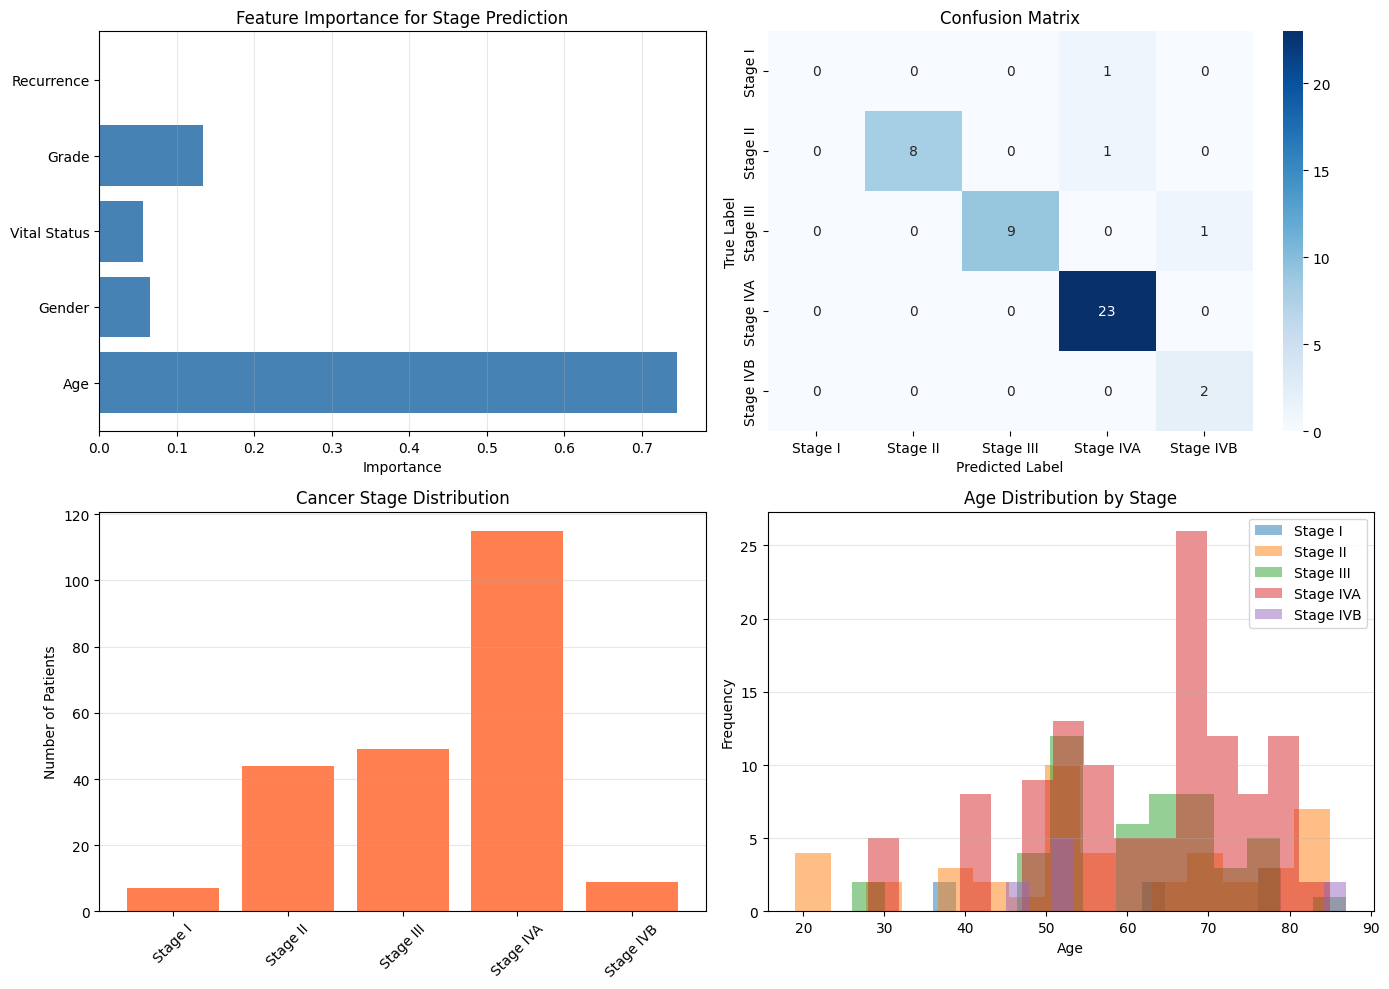


✓ Visualizations complete!


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Prepare data for stage classification
stage_data = clinical_clean[['demographic.age_at_index',
                             'demographic.gender',
                             'demographic.vital_status',
                             'diagnoses.tumor_grade',
                             'diagnoses.progression_or_recurrence',
                             'diagnoses.ajcc_clinical_stage']].copy()

# Rename for simplicity
stage_data.columns = ['age', 'gender', 'vital_status', 'grade', 'recurrence', 'stage']

print("="*60)
print("STAGE CLASSIFICATION DATA")
print("="*60)
print(f"\nTotal samples: {len(stage_data)}")
print(f"\nFirst few rows:")
print(stage_data.head(10))

# Check stage distribution
print("\n" + "="*60)
print("STAGE DISTRIBUTION:")
print("="*60)
print(stage_data['stage'].value_counts().sort_index())

# Remove rows with missing stage data (marked as '--')
print(f"\nRemoving rows with missing stage data...")
stage_data_clean = stage_data[stage_data['stage'] != "'--"].copy()
print(f"Samples after cleaning: {len(stage_data_clean)}")

print("\nStage distribution after cleaning:")
print(stage_data_clean['stage'].value_counts().sort_index())

# Encode categorical variables
le_gender = LabelEncoder()
le_vital = LabelEncoder()
le_grade = LabelEncoder()
le_recurrence = LabelEncoder()
le_stage = LabelEncoder()

stage_data_clean['gender'] = le_gender.fit_transform(stage_data_clean['gender'])
stage_data_clean['vital_status'] = le_vital.fit_transform(stage_data_clean['vital_status'])
stage_data_clean['grade'] = le_grade.fit_transform(stage_data_clean['grade'])
stage_data_clean['recurrence'] = le_recurrence.fit_transform(stage_data_clean['recurrence'])
stage_data_clean['stage'] = le_stage.fit_transform(stage_data_clean['stage'])

print("\n" + "="*60)
print("ENCODED DATA (First 10 rows):")
print("="*60)
print(stage_data_clean.head(10))

# Prepare features and target
X = stage_data_clean[['age', 'gender', 'vital_status', 'grade', 'recurrence']]
y = stage_data_clean['stage']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Split into training and testing (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")

# Train Random Forest Classifier
print("\n" + "="*60)
print("TRAINING RANDOM FOREST MODEL...")
print("="*60)

model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
model.fit(X_train, y_train)

print("✓ Model trained successfully!")

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("\n" + "="*60)
print("MODEL PERFORMANCE:")
print("="*60)
print(f"\nAccuracy: {accuracy:.2%}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred,
                          target_names=le_stage.classes_))

# Feature importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE:")
print("="*60)
feature_names = ['Age', 'Gender', 'Vital Status', 'Grade', 'Recurrence']
importances = model.feature_importances_

for name, importance in zip(feature_names, importances):
    print(f"{name:20s}: {importance:.4f} ({importance*100:.2f}%)")

# Visualize confusion matrix
print("\n" + "="*60)
print("CONFUSION MATRIX:")
print("="*60)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Feature Importance
axes[0, 0].barh(feature_names, importances, color='steelblue')
axes[0, 0].set_xlabel('Importance')
axes[0, 0].set_title('Feature Importance for Stage Prediction')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=le_stage.classes_, yticklabels=le_stage.classes_)
axes[0, 1].set_title('Confusion Matrix')
axes[0, 1].set_ylabel('True Label')
axes[0, 1].set_xlabel('Predicted Label')

# 3. Stage Distribution
stage_counts = stage_data_clean['stage'].value_counts().sort_index()
axes[1, 0].bar(range(len(stage_counts)), stage_counts.values, color='coral')
axes[1, 0].set_xticks(range(len(stage_counts)))
axes[1, 0].set_xticklabels(le_stage.classes_, rotation=45)
axes[1, 0].set_title('Cancer Stage Distribution')
axes[1, 0].set_ylabel('Number of Patients')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Age distribution by stage
for stage_label in le_stage.classes_:
    stage_idx = np.where(le_stage.classes_ == stage_label)[0][0]
    ages = stage_data_clean[stage_data_clean['stage'] == stage_idx]['age'].values
    axes[1, 1].hist(ages, alpha=0.5, label=stage_label, bins=15)
axes[1, 1].set_title('Age Distribution by Stage')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualizations complete!")